## Laboratorium 4 - algorytm Najbliższej Średniej (NM)


### Opis
Celem laboratorium jest implementacja klasyfikatora najbliższej średniej NM (*Nearest Mean*).


### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:
* Wczytaj dane.
* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Euklidesa**.
* Zaimplementuj funkcję, która zwraca macierz kowariancji (*uwaga: biblioteka `numpy` posiada gotową implementację `cov` z którą możesz porównać wynik*).

    \begin{equation*}
    C = \frac{1}{n - 1} (X - \bar X)(X - \bar X)^T
    \end{equation*}

    gdzie:
    * $X$ to macierz, 
    * $\bar X$ to wektor ze średnimi wartościami cech. 

* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Machalanobisa**.

    \begin{equation*}
    D_j = \sqrt{ (x - \mu_j)^T S_j^{-1}(x - \mu_j) },
    \end{equation*}

    gdzie:
    * $D_j$ to odległość klasyfikowanej próbki do $j$-tej klasy (grupy, klastra), 
    * $\mu_j$ to wektor ze średnimi wartościami cech w obrębie $j$-tej klasy, 
    * $S_j^{-1}$ to odwrócona macierz kowariancji $j$-tej klasy, 
    * a $x$ to klasyfikowana próbka.

* Opisz wyniki klasyfikatorów i porównaj je z klasyfikatorem *k*NN (porównaj w kontekście różnych metryk - obowiązkowo tablica pomyłek).

> Podpowiedź 1: Do obliczenia macierzy odwrotnej możesz użyć gotową implementację, np. funkcję `linalg.inv` z biblioteki `numpy`.

> Podpowiedź 2: Do wszelkich podstawowych operacji na macierzach (mnożenie, transpozycja, dodawanie, odejmowanie, itp.) możesz zastosować gotową implementację, np. bibliotekę `numpy`.

> UWAGA 1: W niniejszym zadaniu jest dowolność implementacji (nie trzeba trzymać się struktury z poprzedniego zadania), jednak algorytm NM należy zaimplementować samodzielnie bez korzystania z istniających rozwiązań (jak np. z biblioteki `scikit-learn`).

> UWAGA 2: Wszystkie wykonane elementy zadania powinny posiadać stosowne komentarze i opisy.


**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość).**

Przykład (na podstawie tablicy pomyłek):

**Źle** (nie wiadomo co jest poniżej zaprezentowane, kolumny ani wiersze nie są podpisane, nie wiadomo które z nich prezentują predykcje, a które właściwe etykiety):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```


<span style="text-decoration:underline">Referencje</span>

1. Mahalanobis, P C, _On test and measures of group divergence : theoretical formulae_, Journal and Proceedings of Asiatic Society of Bengal (New Series) Vol. 26, pp. 541-588. 1930. (URL: http://library.isical.ac.in:8080/xmlui/bitstream/handle/10263/1639/029.pdf)
2. McLachlan, Goeffrey J. _Mahalanobis distance_, Resonance, pp. 20-26. 1999. (URL: https://www.ias.ac.in/article/fulltext/reso/004/06/0020-0026)

In [160]:
import numpy as np

#Import danych wraz z rozdziałem na zbiór testowy i treningowy
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

classes = [3,5]
features = [4,5,6]
train_new = train[np.isin(train[:,0], classes)]
test_new =  test[np.isin(test[:,0], classes)]
print(test_new)


[[3.00000000e+00 3.00000000e+00 6.12890000e-01 ... 1.16720000e-02
  1.21210000e-04 1.10760000e+00]
 [3.00000000e+00 1.00000000e+01 5.95710000e-01 ... 1.08810000e-02
  6.46800000e-05 8.32210000e-01]
 [5.00000000e+00 1.10000000e+01 8.22680000e-01 ... 1.35230000e-02
  2.75020000e-04 1.53770000e+00]
 ...
 [5.00000000e+00 3.00000000e+00 8.86221004e-01 ... 4.41266215e-03
  2.09924833e-04 9.47233211e-01]
 [5.00000000e+00 1.00000000e+00 9.24959660e-01 ... 4.41835640e-03
  2.06882565e-04 1.18037394e+00]
 [3.00000000e+00 2.00000000e+00 7.61480531e-01 ... 4.47887086e-03
  5.91141052e-05 5.45180710e-01]]


In [239]:
ilosc_danych = np.zeros(len(classes))
i = 0

# Liczenie powtórzeń
for klasa in classes:
        for trainer in train_new:
            if (trainer[0] == klasa):
                ilosc_danych[i] = ilosc_danych[i] +1
        i=i+1
        
suma = [ [0] * len(features) for _ in range(len(classes))]
srednia = [ [0] * len(features) for _ in range(len(classes))]
Wektor_X = [ [0] * len(features) for _ in range(len(ilosc_danych))]
#liczenie sumy
i=0
for klasa in classes:
        for trainer in train_new:
                if (trainer[0] == klasa):
                    #print(trainer[features])
                    Wektor_X[i].append(trainer[features])
                    suma[i] = suma[i] + trainer[features]
        i = i+1

#liczenie średnich
for klasa in range(0,len(classes)):
    for cecha in range(0,len(features)):
        #print(klasa)
        #print(suma[klasa][cecha])
        srednia[klasa][cecha] = suma[klasa][cecha] / ilosc_danych[klasa]

print(srednia)
#print(suma)
#print(ilosc_danych)
print(Wektor_X[1][:])

[[0.3437485691562506, 0.8923959391845147, 0.99044242414578], [0.6437878635015158, 0.841444822467081, 0.8883383938900382]]
[0, 0, 0, array([0.7298 , 0.81793, 0.86491]), array([0.69555, 0.80873, 0.85263]), array([0.58345, 0.83383, 0.91754]), array([0.6025 , 0.84981, 0.87544]), array([0.6558 , 0.82432, 0.89474]), array([0.63974, 0.8499 , 0.87368]), array([0.62464, 0.85754, 0.89298]), array([0.77898905, 0.75076192, 1.00160454]), array([0.62150417, 0.68978915, 0.99080062]), array([0.63877705, 0.86738787, 0.77936936]), array([0.64789381, 0.86093215, 0.83070162]), array([0.70758293, 0.77636967, 0.92298919]), array([0.66431643, 0.98429624, 0.80651877]), array([0.54940036, 0.73373645, 1.01447428]), array([0.66703797, 0.84708309, 0.9973984 ]), array([0.68945043, 0.73850269, 0.98950119]), array([0.65601138, 0.95329921, 0.87724704]), array([0.65385464, 0.86688964, 0.98956356]), array([0.67660544, 0.76301111, 0.82631076]), array([0.61394725, 0.77600502, 0.9211134 ]), array([0.62172371, 0.77246711, 

In [192]:
def edist(p1, p2, l_cech):
    edvalue=0
    for cecha in range(l_cech):
        edvalue +=(p1[cecha]- p2[cecha])**2
    return edvalue**(0.5)



In [211]:

punkt = [1,1,1]
minimal = 100
przyd_klasa = []

for tester in test_new:
    p_licz=0
    #punkt 3 cech
    for cecha in features:
        punkt[p_licz] = tester[cecha]
        p_licz = p_licz+1
    k_licz=0
    minimal = 100;
    for klasa in classes:
        if edist(srednia[k_licz],punkt,len(features)) < minimal:
            minimal = edist(srednia[k_licz],punkt,len(features))
            przyd_klasa.append(klasa)
        k_licz=k_licz+1
    #print(przyd_klasa)
            
print(przyd_klasa)
print(Wektor_X)
Srednia_wektor = []
for x in range(len(Wektor_X)):
        Srednia_wektor.append(1)
def kowariancja(n, X, Avg):
    C = (1/(n-1) * (X - Avg) * np.transpose(X - Avg))
    
    

[3, 3, 3, 5, 3, 5, 3, 5, 3, 3, 3, 5, 3, 5, 3, 3, 3, 3, 5, 3, 5, 3, 5, 3, 3, 3, 5, 3, 5, 3, 3, 3, 3, 5, 3, 5, 3, 5, 3, 3, 3, 5, 3, 5, 3, 3, 3, 3, 5, 3, 5, 3, 5, 3, 3, 3, 5, 3, 5, 3, 3, 3, 3, 5, 3, 5, 3, 5, 3, 3, 3, 5, 3, 5, 3, 3, 3, 3, 5, 3, 5, 3, 5, 3, 3, 3, 5, 3, 5, 3, 3, 3, 3, 5, 3, 5, 3, 5, 3, 3, 3, 5, 3, 5, 3, 3, 3, 3, 5, 3, 5, 3, 5, 3, 3, 3, 5, 3, 5, 3, 3, 3, 3, 5, 3, 5, 3, 5, 3, 3, 3, 5, 3, 5, 3, 3, 3, 3, 5, 3, 5, 3, 5, 3, 3, 3, 5, 3, 5, 3, 3, 3, 3, 5, 3, 5, 3, 5, 3, 3, 3, 5, 3, 5, 3]
[array([0.35318, 0.89086, 0.99825]), array([0.29593, 0.91585, 0.99825]), array([0.36317, 0.9211 , 0.98772]), array([0.3446 , 0.90487, 0.99649]), array([0.3846 , 0.90355, 0.99649]), array([0.30382361, 0.97275288, 1.04904262]), array([0.25229802, 0.87681774, 1.09275575]), array([0.39312331, 0.82565976, 0.98901   ]), array([0.2921524 , 0.77027558, 0.92476442]), array([0.41018094, 0.79816703, 1.11261905]), array([0.2993928 , 0.78552216, 0.87559723]), array([0.26264162, 0.86392804, 1.04260931]), array([0

In [24]:
def nm(train, to_test, features):
    min = 0
    predicted = None
    for training_element in train:
        ret = edist(to_test, training_element, features)
        if min == 0 or min > ret:
            min = ret
            predicted = training_element
    return predicted[0]




In [25]:
from sklearn.metrics import accuracy_score

features = list(range(2, 16))
predict_list = []
for to_test in test_new:
    predict_list.append(nm(class_mean_list, to_test, features))
print(accuracy_score(true_list, predict_list) * 100)

100.0


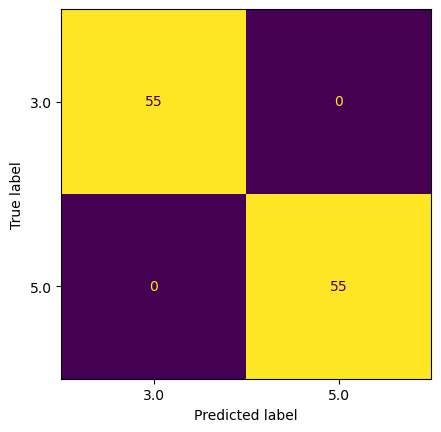

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(true_list, predict_list, colorbar=False)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(true_list, predict_list)

0.7657342657342657

In [22]:


def calc_X(train_list, mean_list):
    train_list = np.array(train_list)
    mean_list = np.array(mean_list)

    train_transpose = train_list.transpose()
    mean = []
    for i in range(len(train_list)):
        mean.append(mean_list)
    mean = np.array(mean)
    mean_transpose = mean.transpose()

    return train_transpose - mean_transpose


In [23]:
x_list = []
for index in clas_list:
    class_list = list(filter(lambda data: data[0] == index, train_new))
    class_list_cleared = []
    for element in class_list:
        class_list_cleared.append(element[2:])
    x_list.append(calc_X(class_list_cleared, class_mean_list[index - 2][2:]))

In [24]:
c_list = []
for element in x_list:
    element = np.array(element)
    c_list.append(np.array(np.dot(element, element.transpose()) / (len(train_new) - 1)))

In [25]:
def nmm(class_mean, to_test, cov):
    min = 0
    predicted = None
    for en_index, training_element in enumerate(class_mean):

        dif = to_test[2:] - training_element[2:]
        dif = np.array(dif)
        inverse = np.array(np.linalg.inv(cov[en_index]))

        value = (dif.transpose() @ inverse @ dif) ** 0.5
        if min == 0 or min > value:
            min = value
            predicted = to_test
    return predicted[0]



In [26]:
from sklearn.metrics import accuracy_score

predict_list = []
for to_test in test_new:
    predict_list.append(nmm(class_mean_list, to_test, c_list))
print(accuracy_score(true_list, predict_list))

1.0


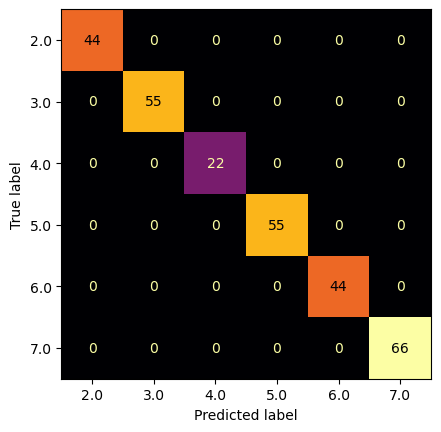

In [27]:
disp = ConfusionMatrixDisplay.from_predictions(true_list, predict_list, colorbar=False, cmap='inferno')